### SofwareX Journal Paper example notebook

In this notebook, we will demonstrate how to use the the WEC-Grid software. This example is the same one as described in the WEC-Grid:ASoftwaretoolforIntegratingWave EnergyGeneratorModels intoPower System Simulations. There are some additional tips and examples

---
### Part 1: WEC-Grid initialization

In [1]:
import WECGrid

engine = WECGrid.Engine("./IEEE_30_bus.RAW")
engine.load(["psse","pypsa"])

PSS®E software initialized
PyPSA software initialized


--- 
### Part 2: Applying our WECs to the grid model

In [2]:
engine.apply_wecs(sim_id=1, ibus=31)

WEC components added to PyPSA network.
WEC components added to PSS®E network.


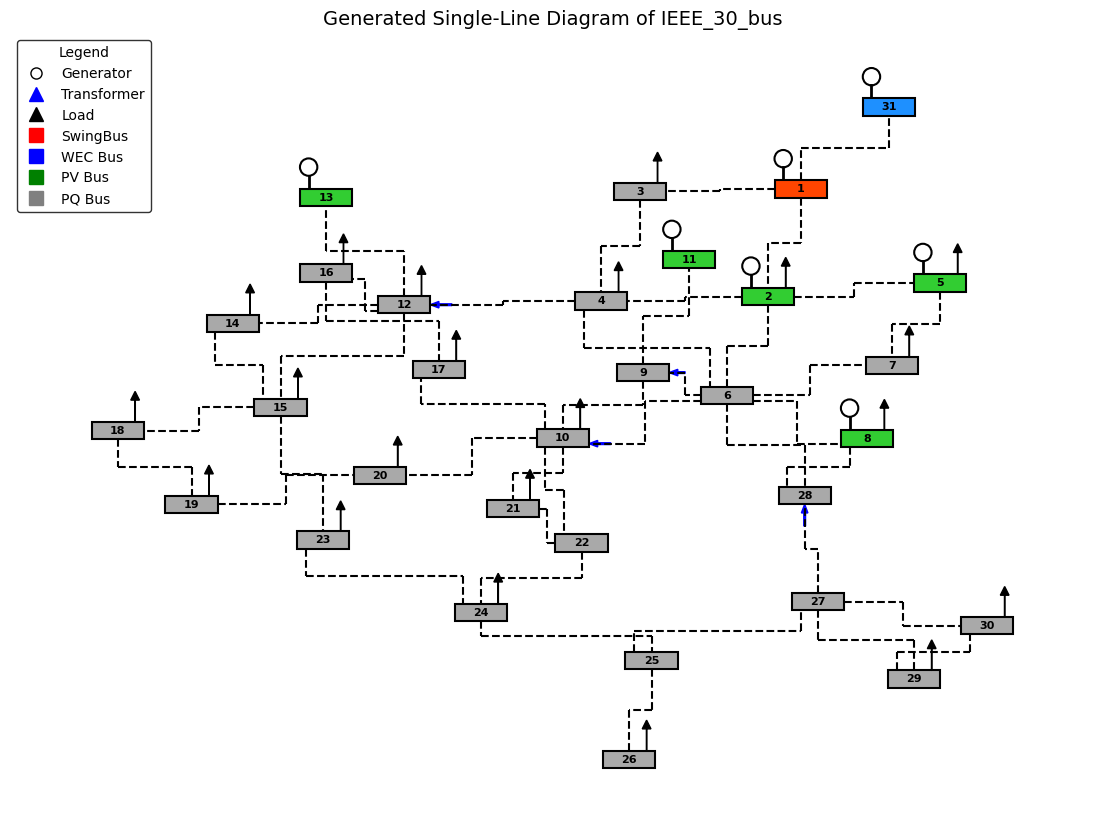

In [3]:
engine.viz.sld()

----
### Part 3: Running the WEC-Grid simulation

Simulating on PSS®E...


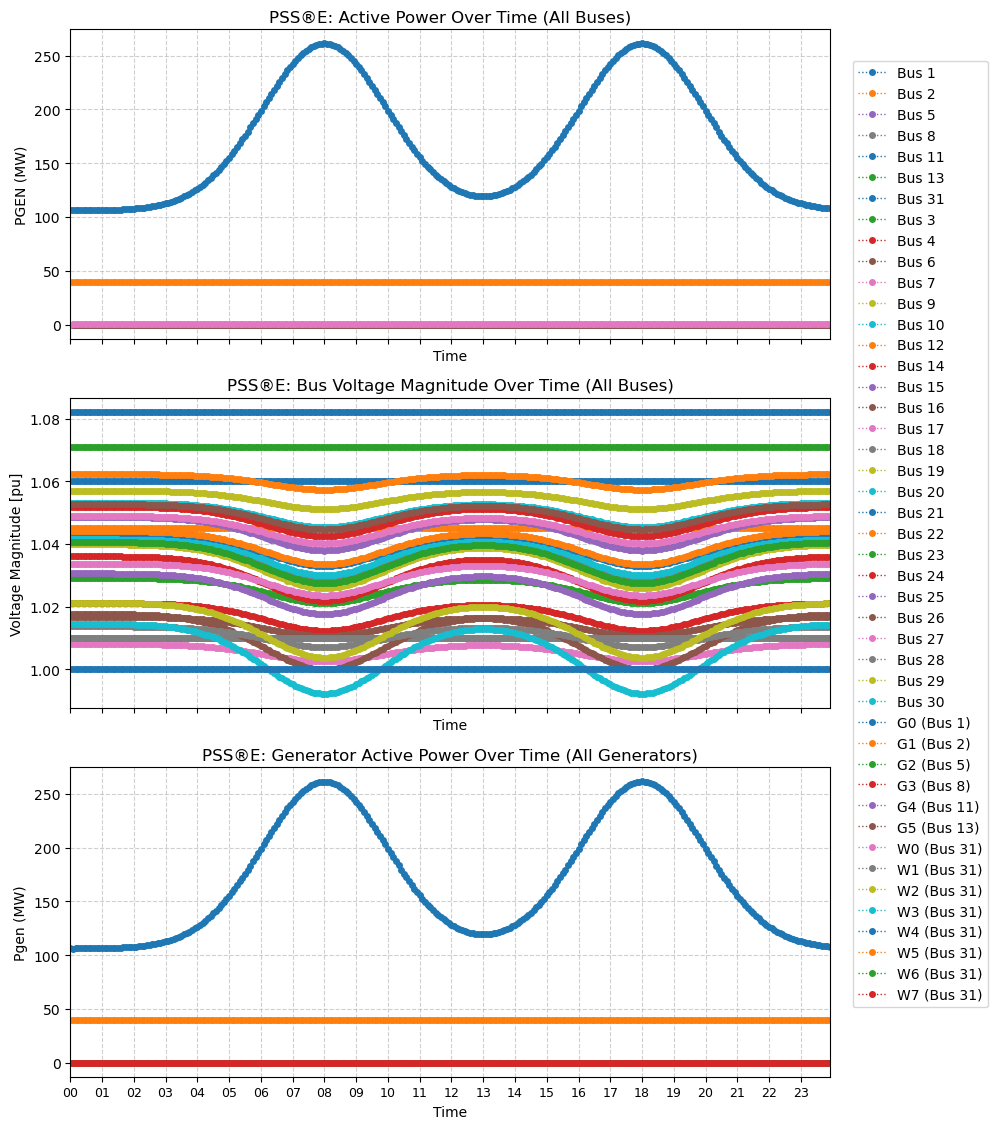

PSS®E simulation complete in 8.921862125396729 seconds. 

Simulating on PyPSA...


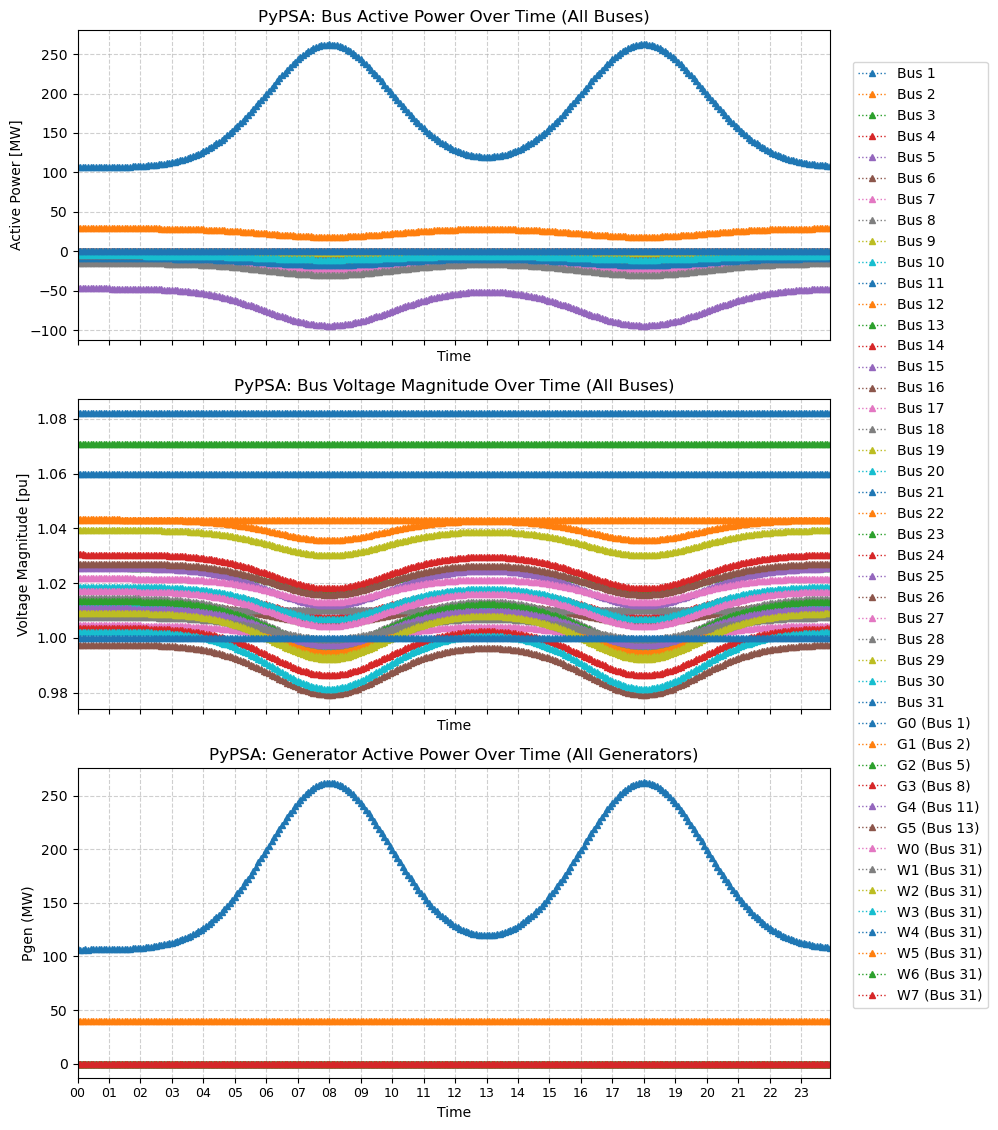

PyPSA simulation complete in 11.994861841201782 seconds. 



In [4]:
engine.simulate()

### Part 3a: Closer look at PSSE Simulation results

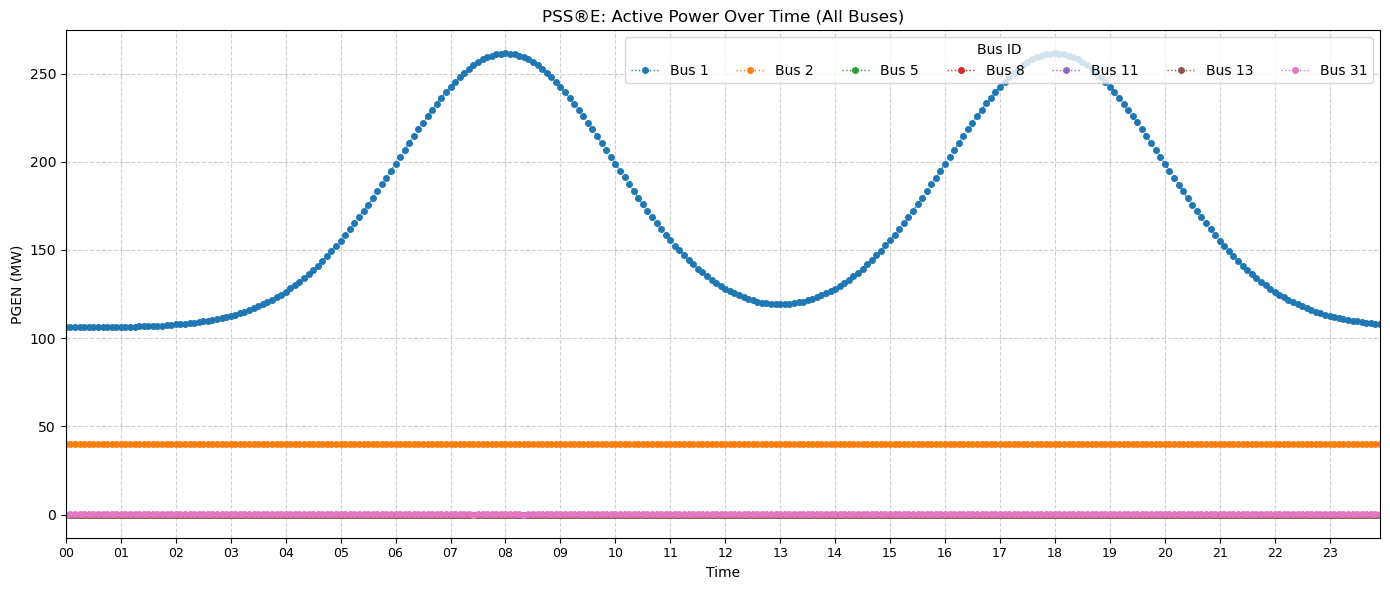

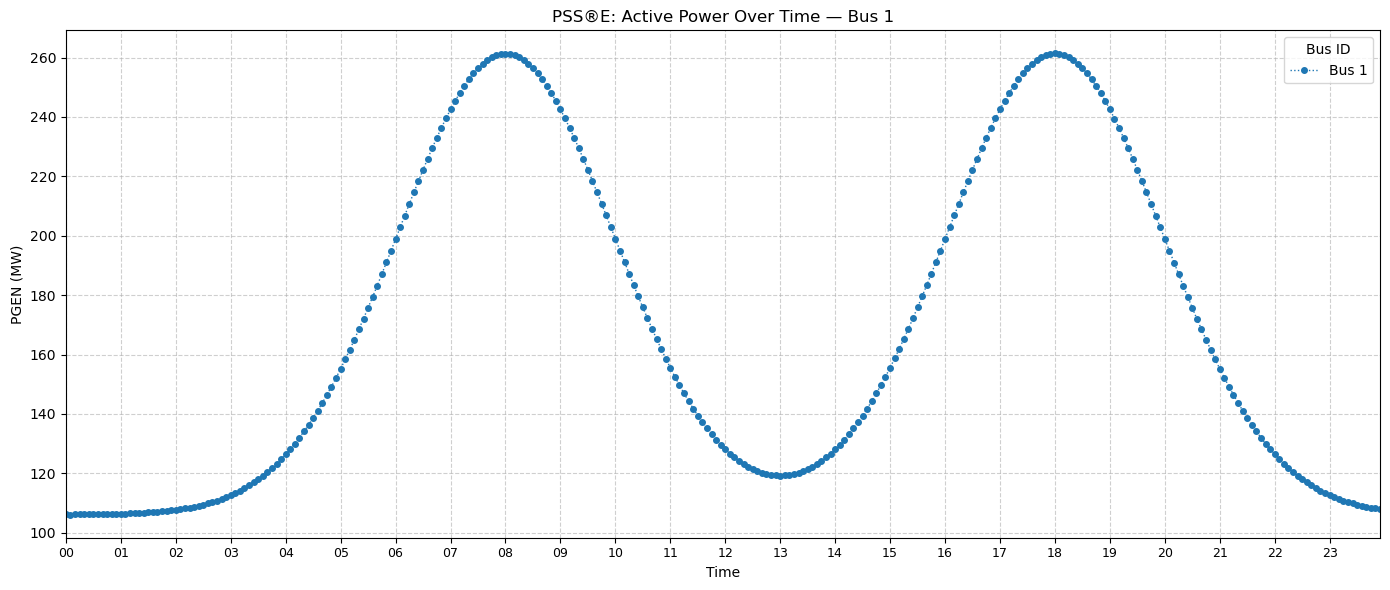

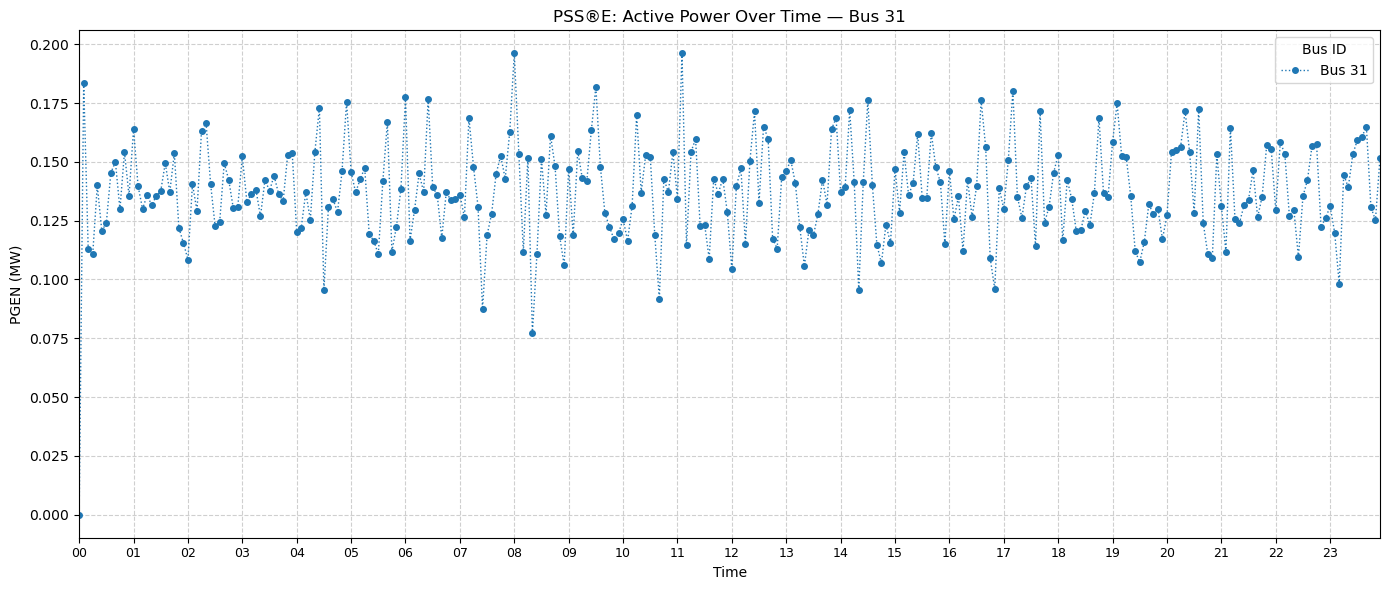

In [5]:
engine.psse.viz.plot_bus_power()
engine.psse.viz.plot_bus_power(1)
engine.psse.viz.plot_bus_power(31)

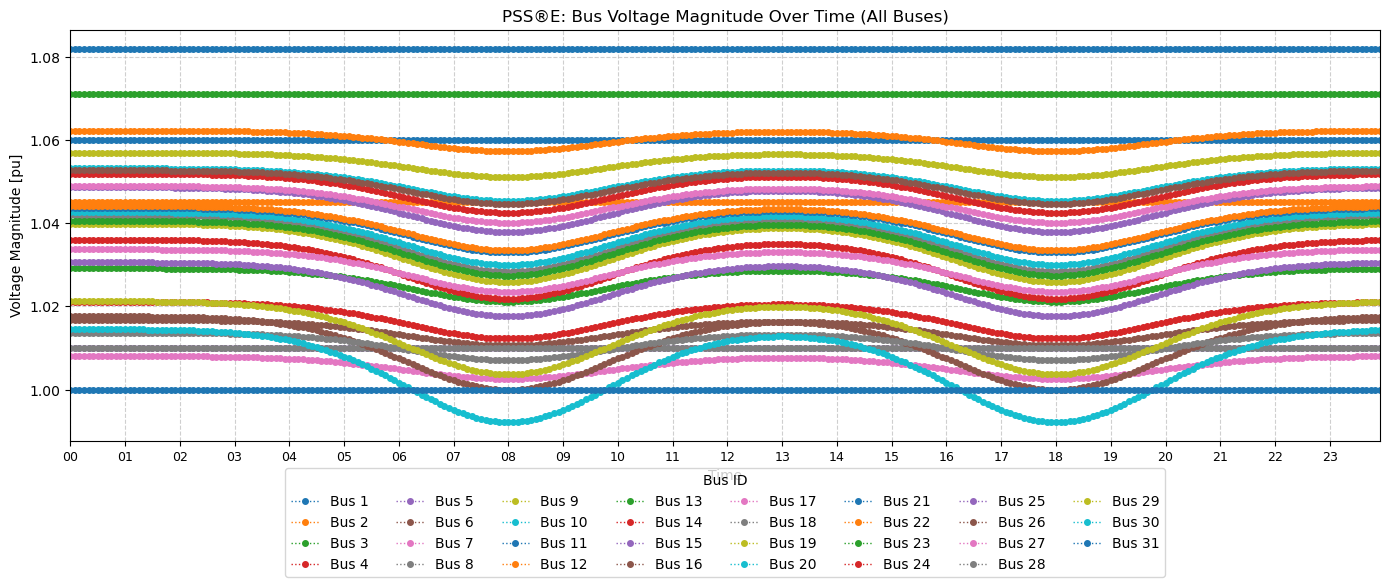

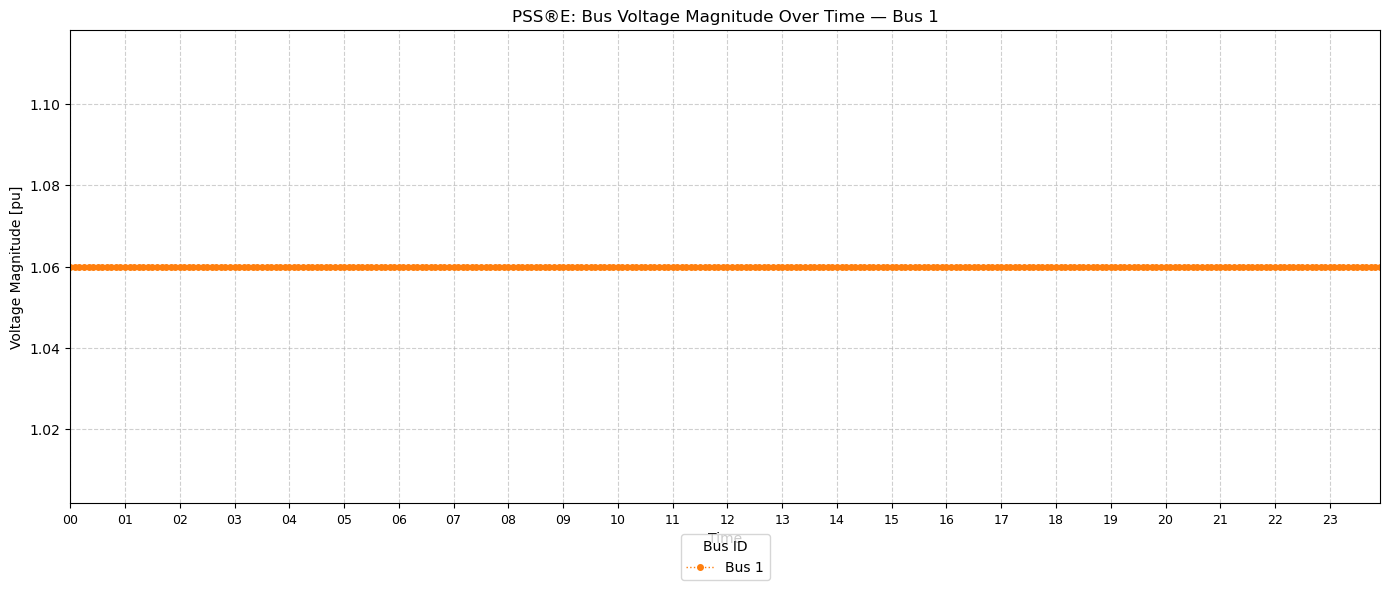

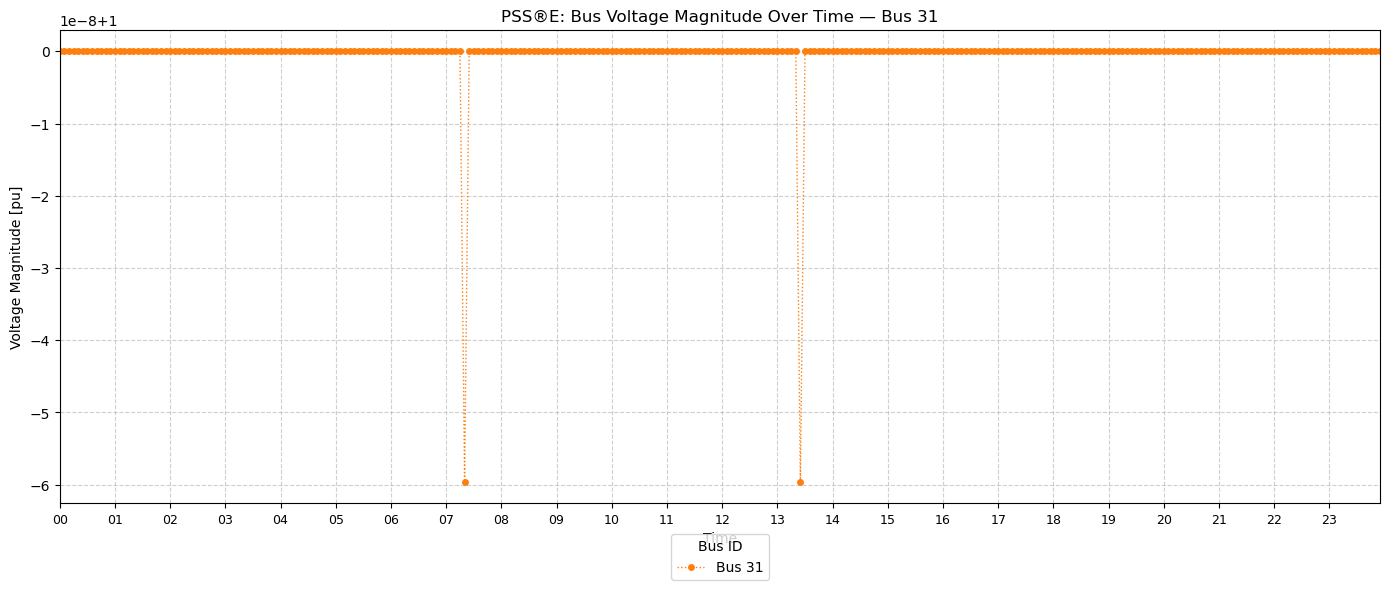

In [6]:
engine.psse.viz.plot_bus_vmag()
engine.psse.viz.plot_bus_vmag(1)
engine.psse.viz.plot_bus_vmag(31)

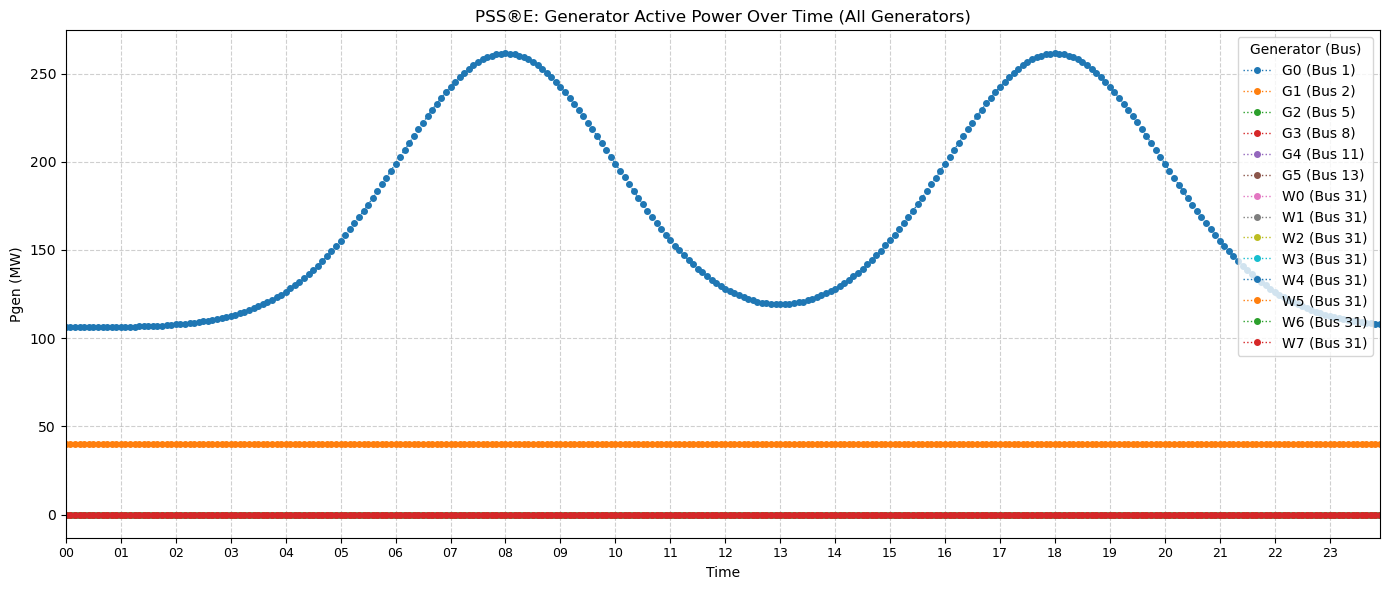

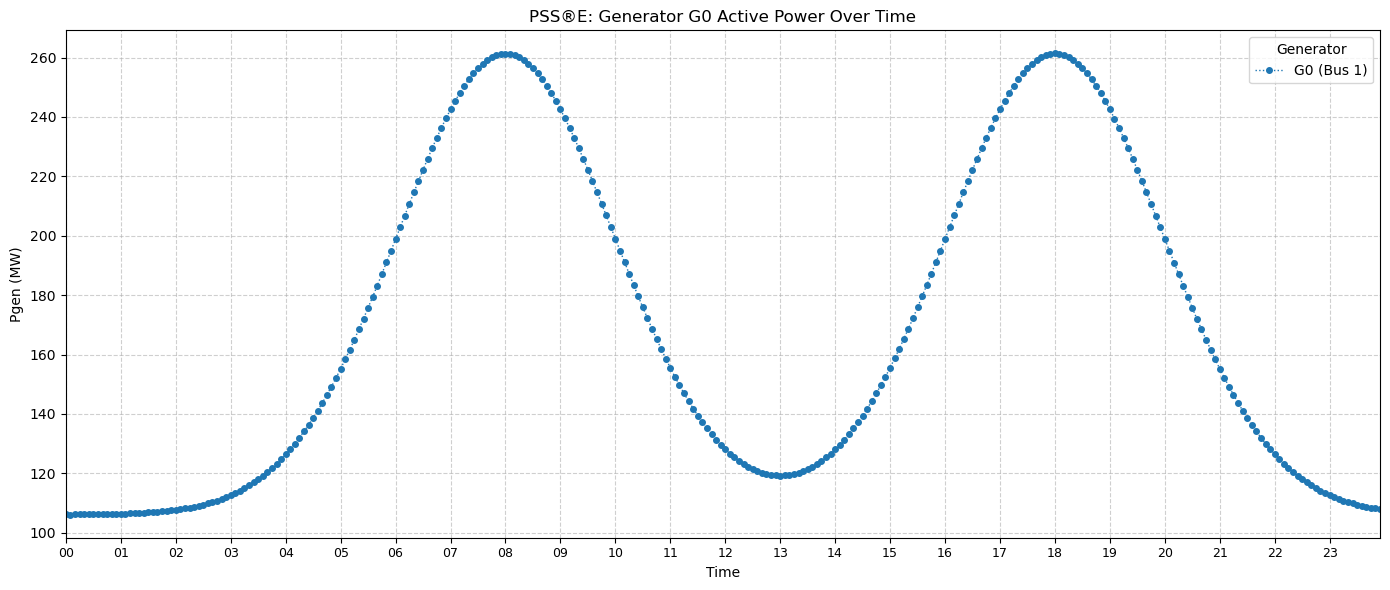

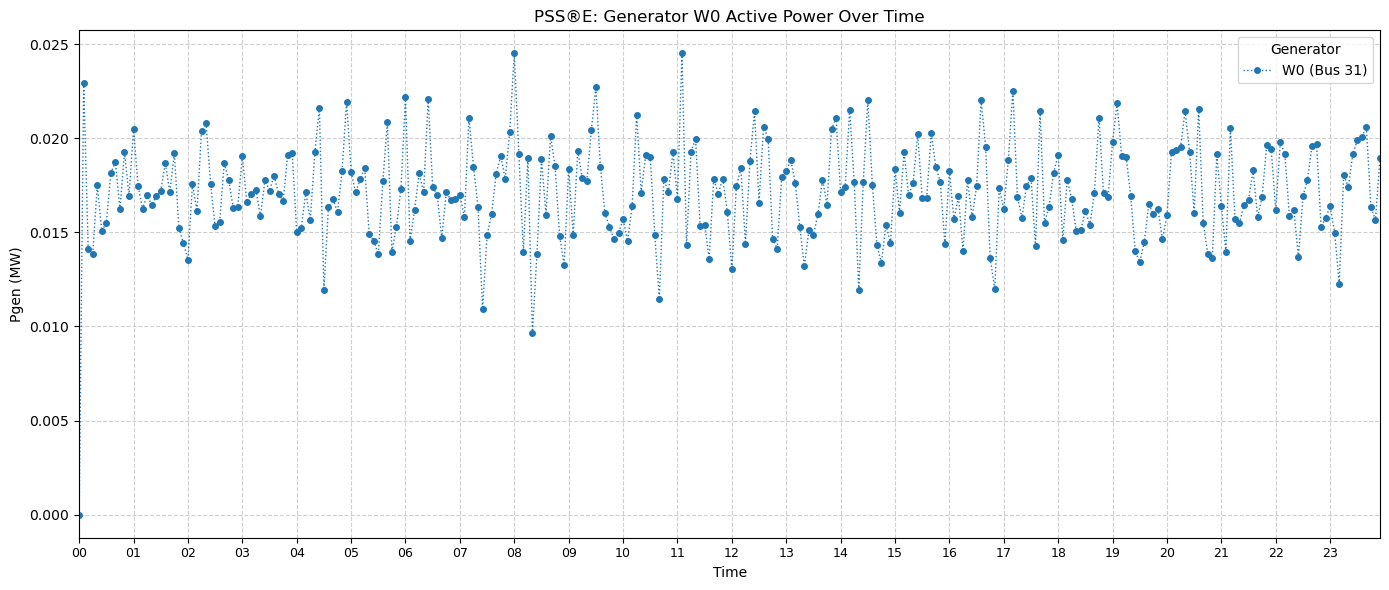

In [7]:
engine.psse.viz.plot_generator_power()
engine.psse.viz.plot_generator_power('G0')
engine.psse.viz.plot_generator_power('W0')

### Part 3b: Closer look at PyPSA Simulation results

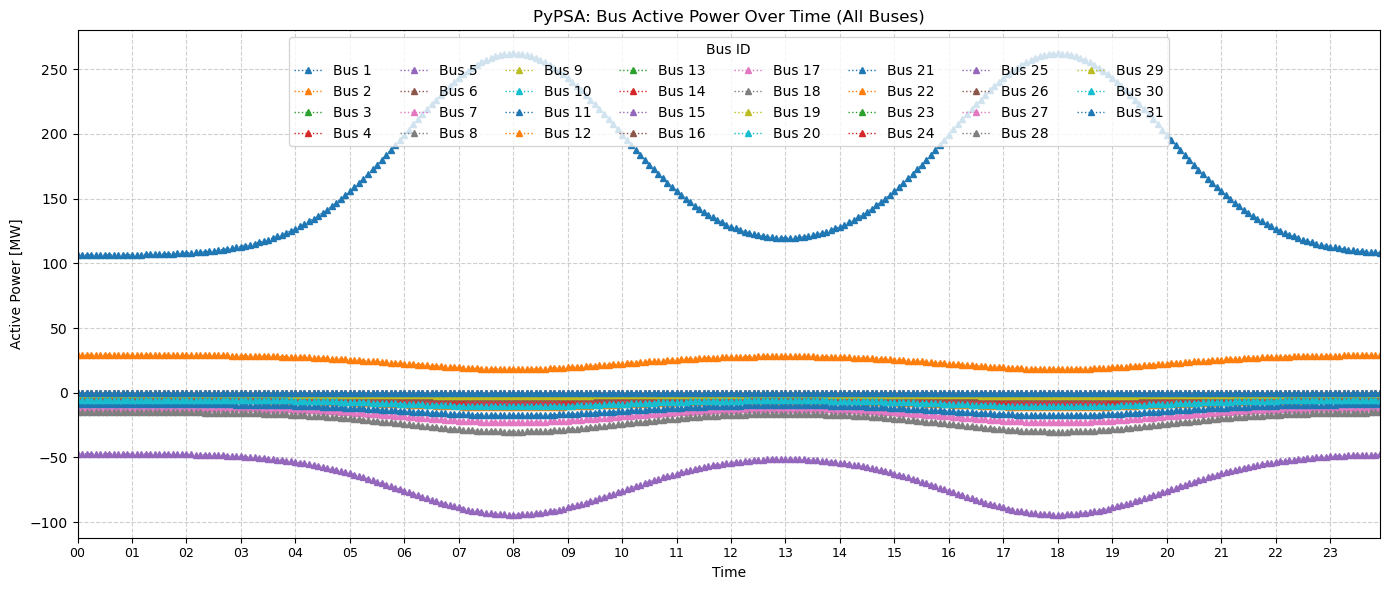

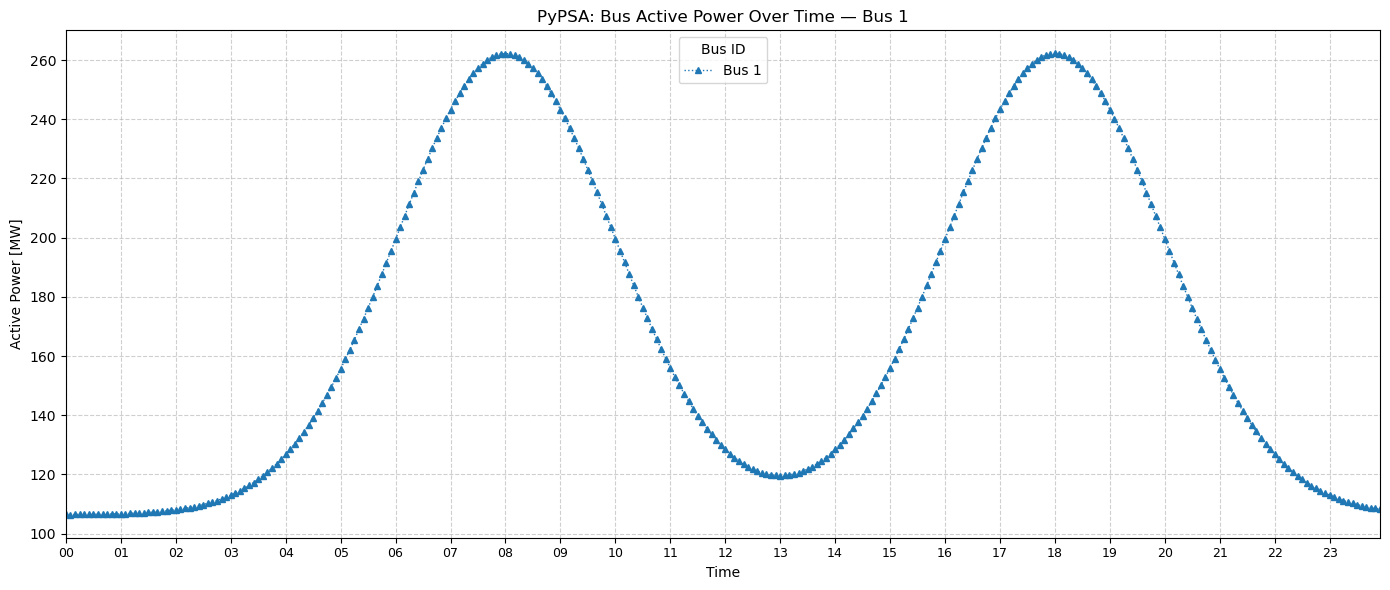

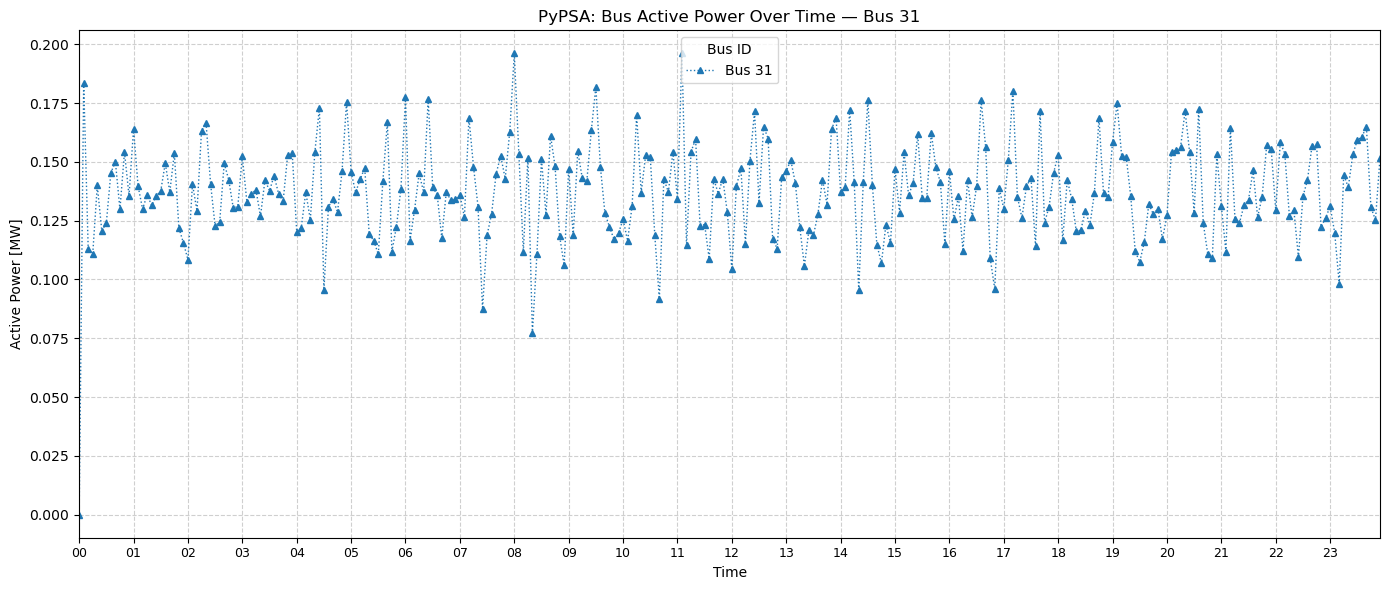

In [8]:
engine.pypsa.viz.plot_bus_power()
engine.pypsa.viz.plot_bus_power(1)
engine.pypsa.viz.plot_bus_power(31)

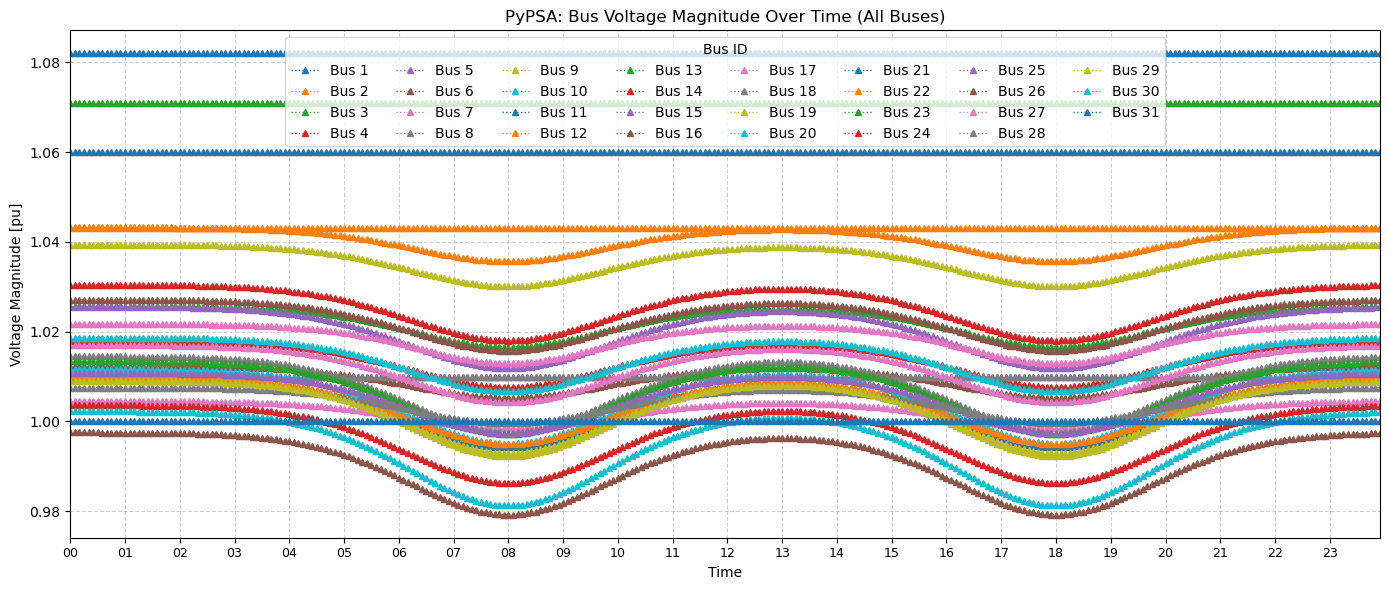

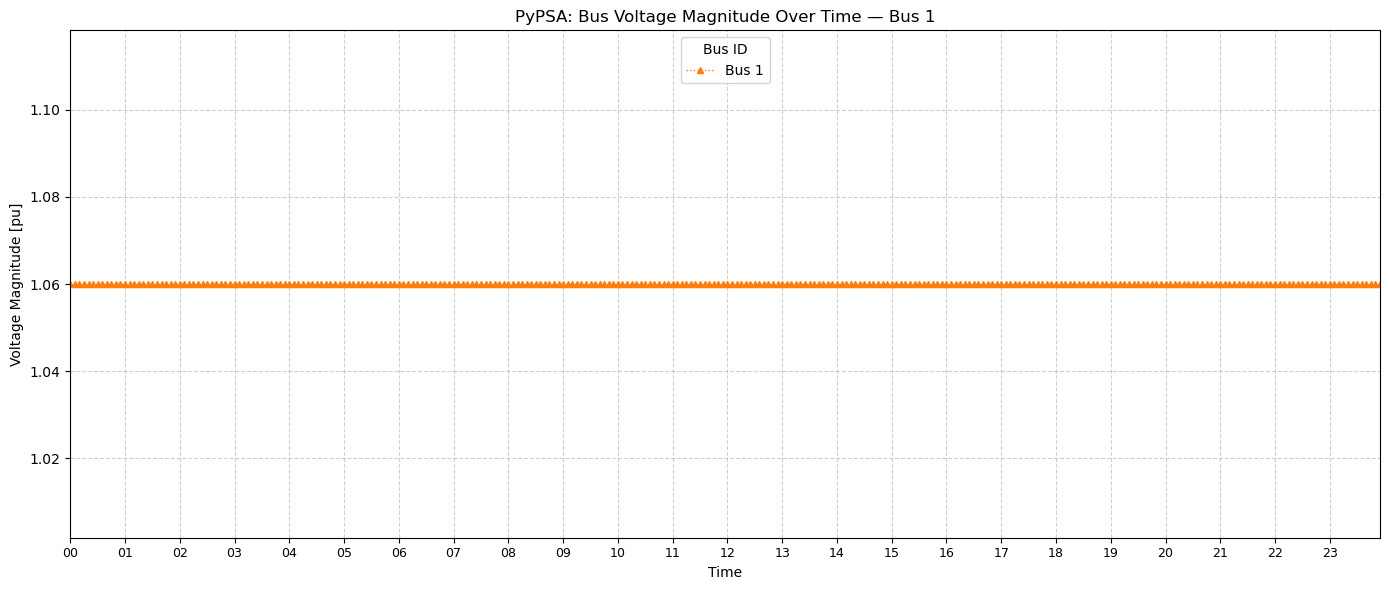

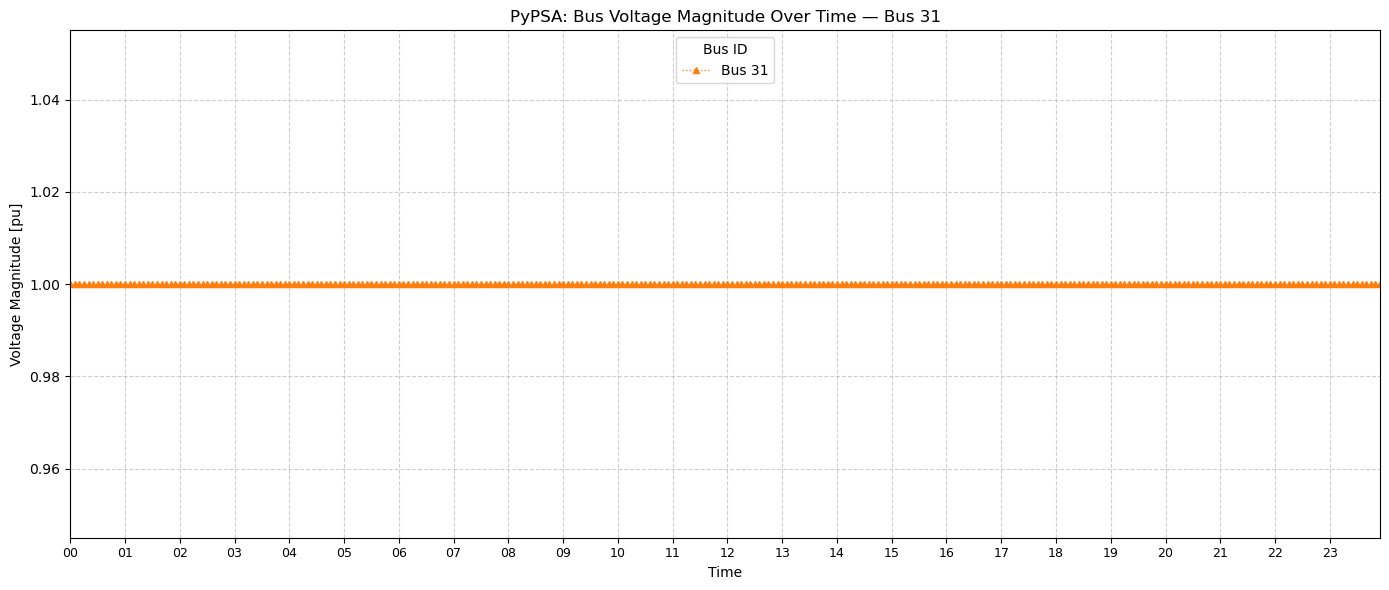

In [9]:
engine.pypsa.viz.plot_bus_vmag()
engine.pypsa.viz.plot_bus_vmag(1)
engine.pypsa.viz.plot_bus_vmag(31)

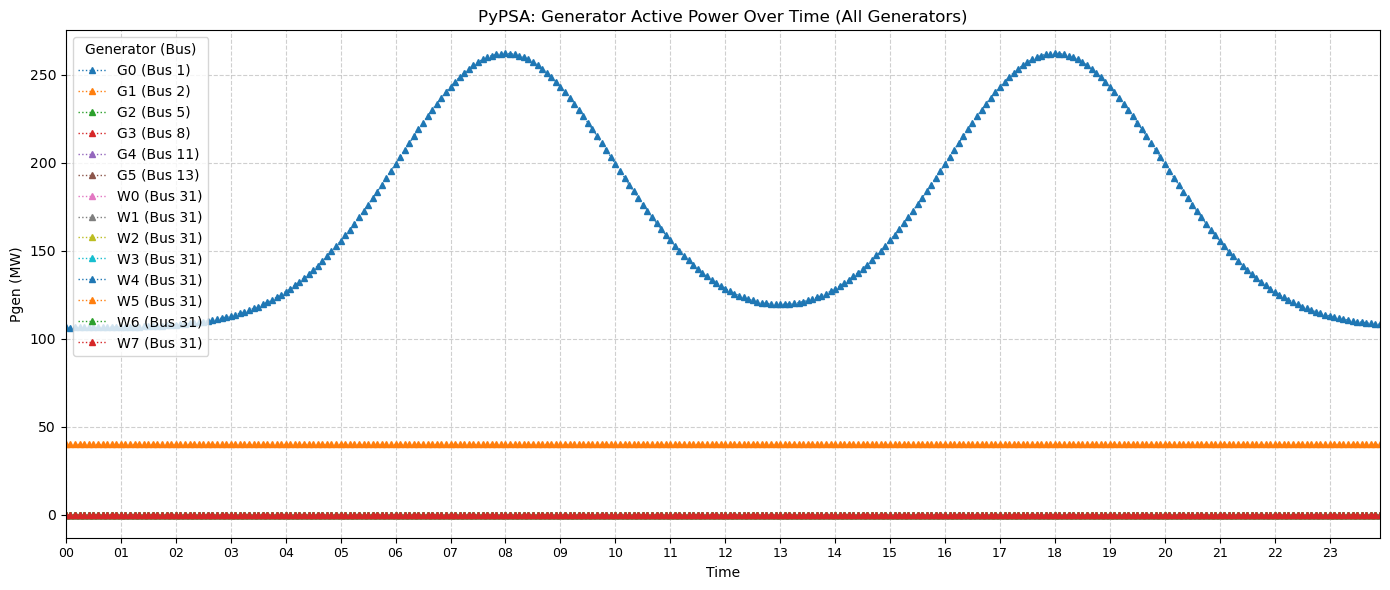

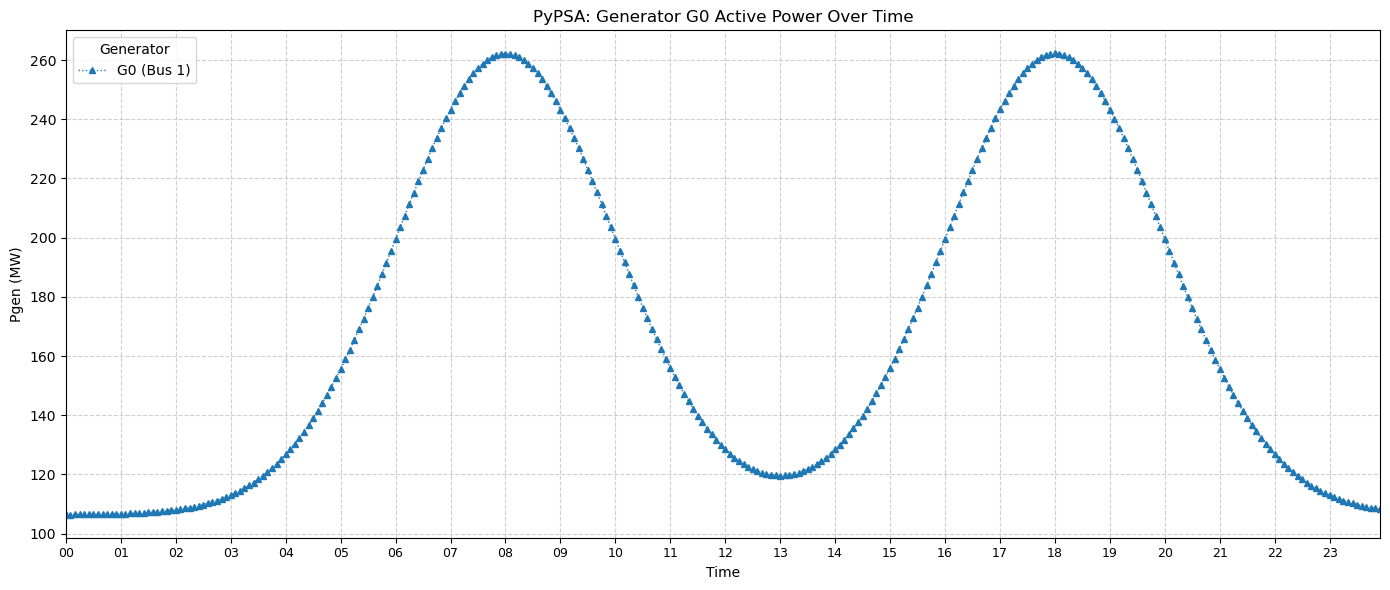

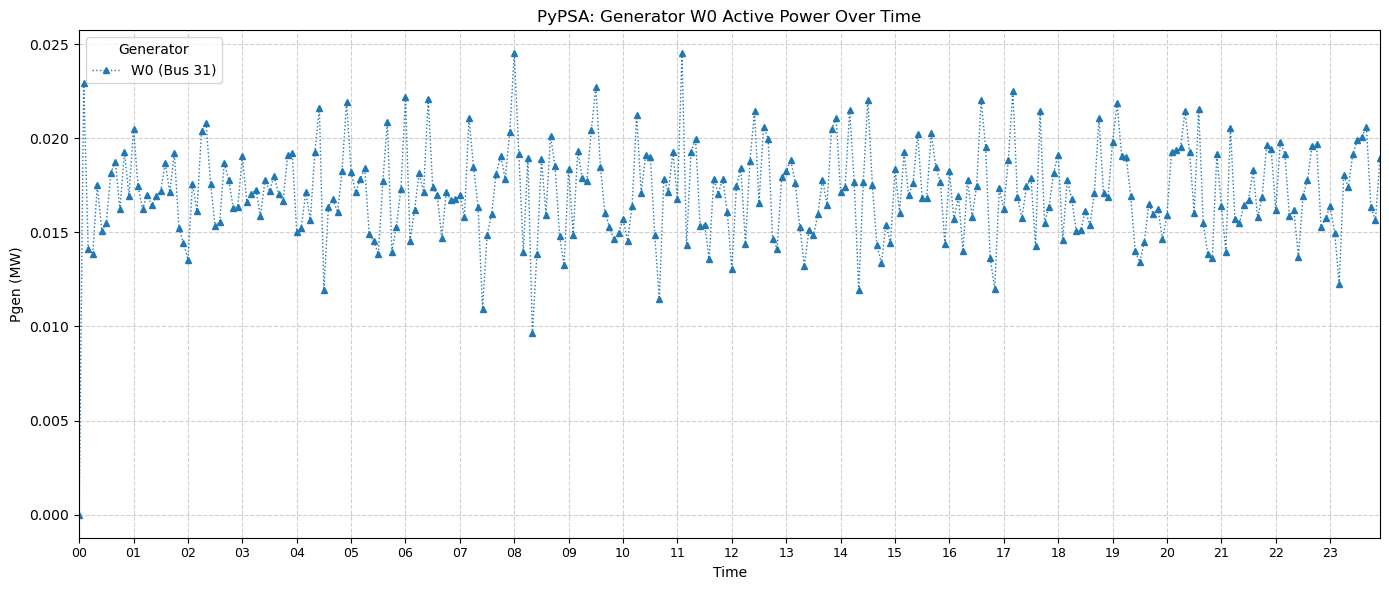

In [10]:
engine.pypsa.viz.plot_generator_power()
engine.pypsa.viz.plot_generator_power('G0')
engine.pypsa.viz.plot_generator_power('W0')

---
### Part 4: Compare the simulation results

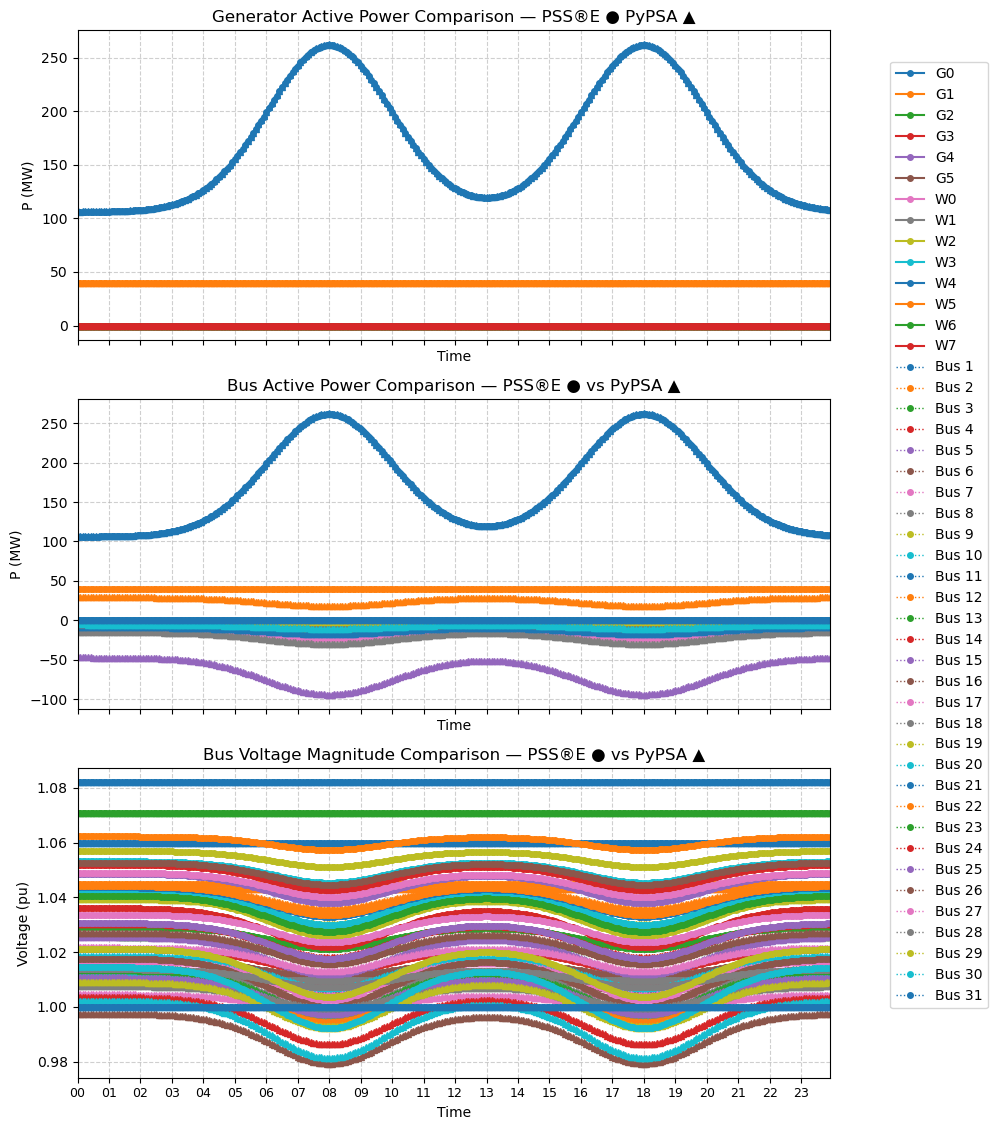

In [11]:
engine.compare_results()

#### RMSE Dataframes

In [12]:
engine.bus_compare

Bus Parameter          RMSE
0    1         P  5.413032e-01
1   10         P  4.233309e+00
2   11         P  0.000000e+00
3   12         P  8.174666e+00
4   13         P  0.000000e+00
..  ..       ...           ...
26   5     V_mag  1.150642e-08
27   6     V_mag  4.743072e-03
28   7     V_mag  3.729504e-03
29   8     V_mag  9.536743e-09
30   9     V_mag  1.889829e-02

[62 rows x 3 columns]

In [13]:
engine.generator_compare

Generator Parameter          RMSE
0         G0         P  5.413032e-01
1         G1         P  0.000000e+00
2         G2         P  0.000000e+00
3         G3         P  0.000000e+00
4         G4         P  0.000000e+00
5         G5         P  0.000000e+00
6         W0         P  5.397262e-10
7         W1         P  5.397262e-10
8         W2         P  5.397262e-10
9         W3         P  5.397262e-10
10        W4         P  5.397262e-10
11        W5         P  5.397262e-10
12        W6         P  5.397262e-10
13        W7         P  5.397262e-10

In [14]:
engine.bus_compare

Bus Parameter          RMSE
0    1         P  5.413032e-01
1   10         P  4.233309e+00
2   11         P  0.000000e+00
3   12         P  8.174666e+00
4   13         P  0.000000e+00
..  ..       ...           ...
26   5     V_mag  1.150642e-08
27   6     V_mag  4.743072e-03
28   7     V_mag  3.729504e-03
29   8     V_mag  9.536743e-09
30   9     V_mag  1.889829e-02

[62 rows x 3 columns]

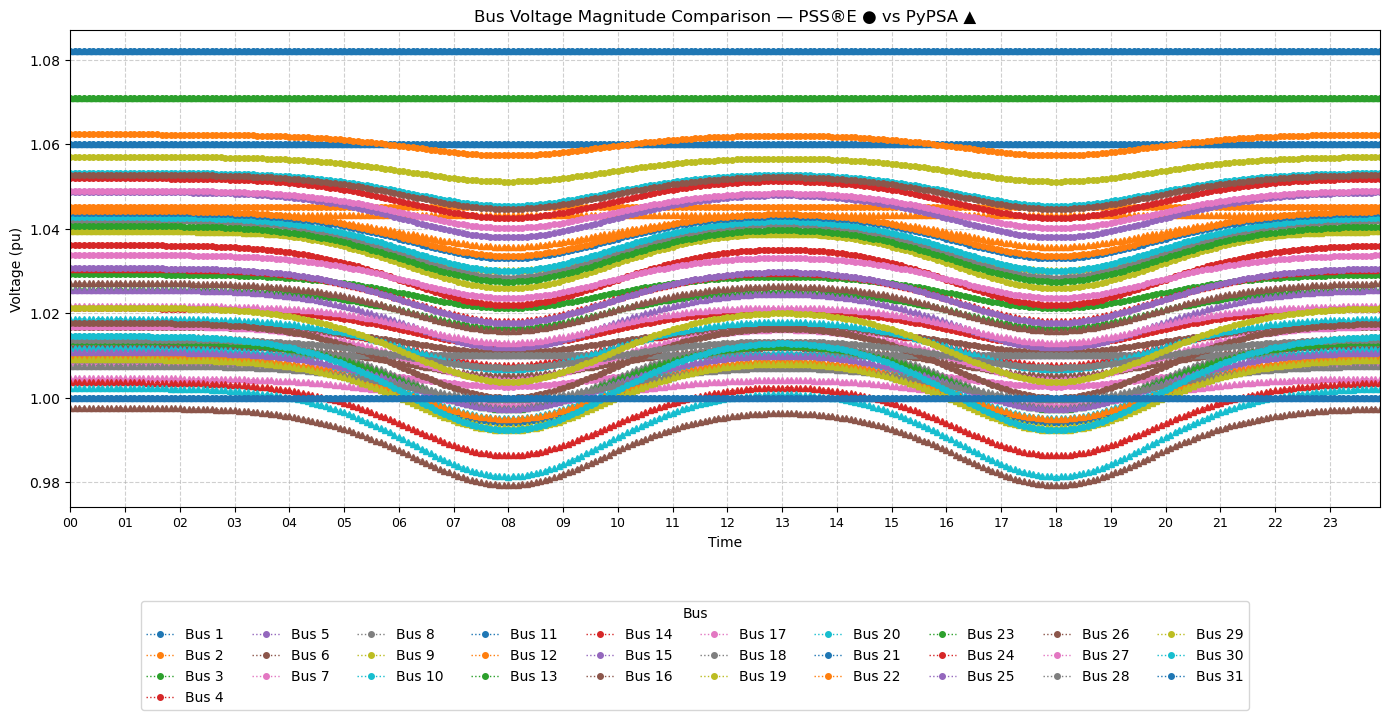

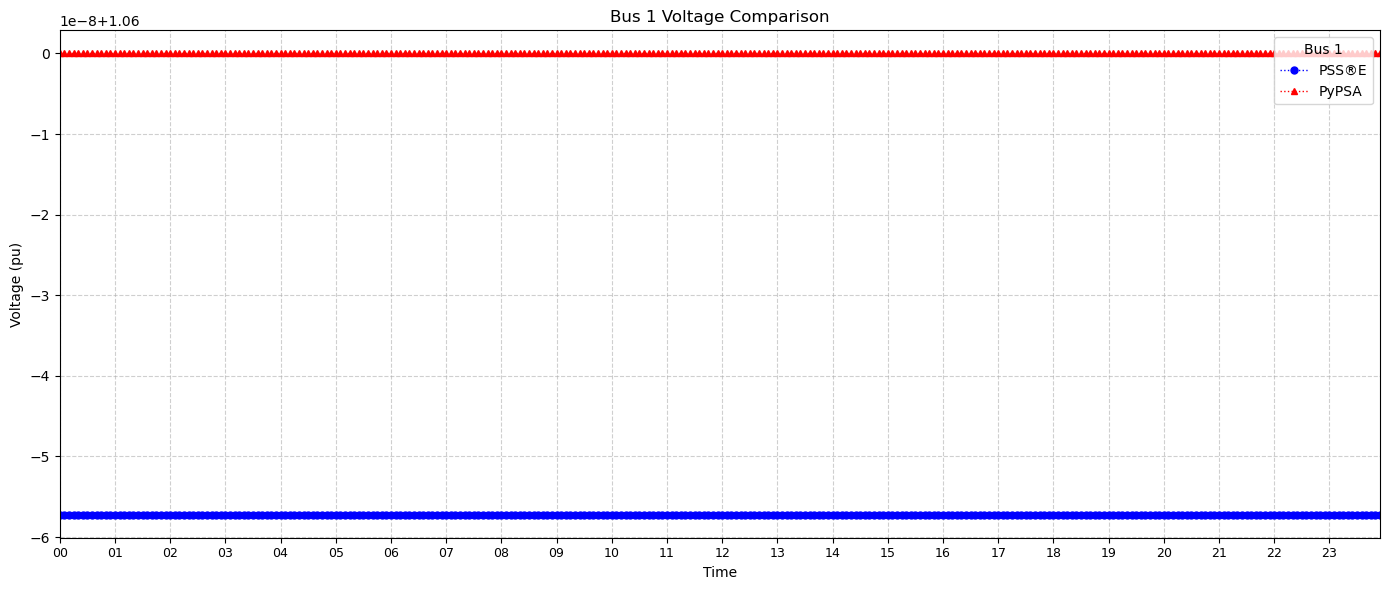

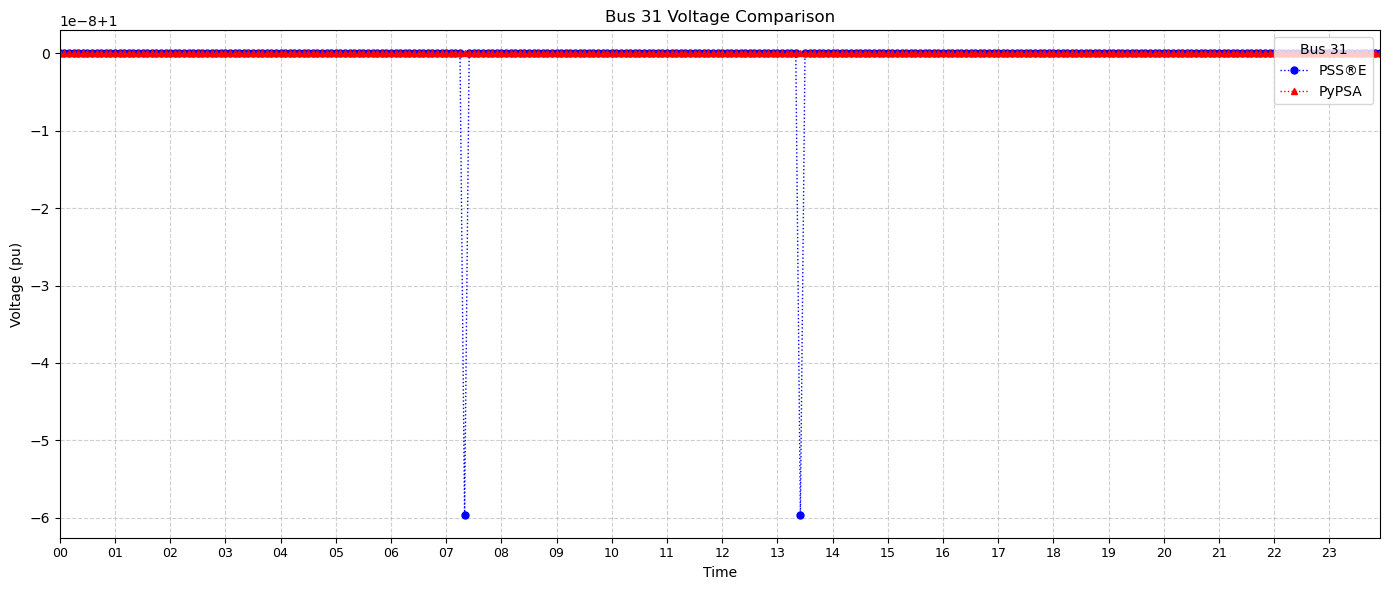

In [15]:
engine.viz.plot_bus_vmag_comparison()
engine.viz.plot_bus_vmag_comparison(1)
engine.viz.plot_bus_vmag_comparison(31)

#### Inspect Active Power 'P' at key system buses

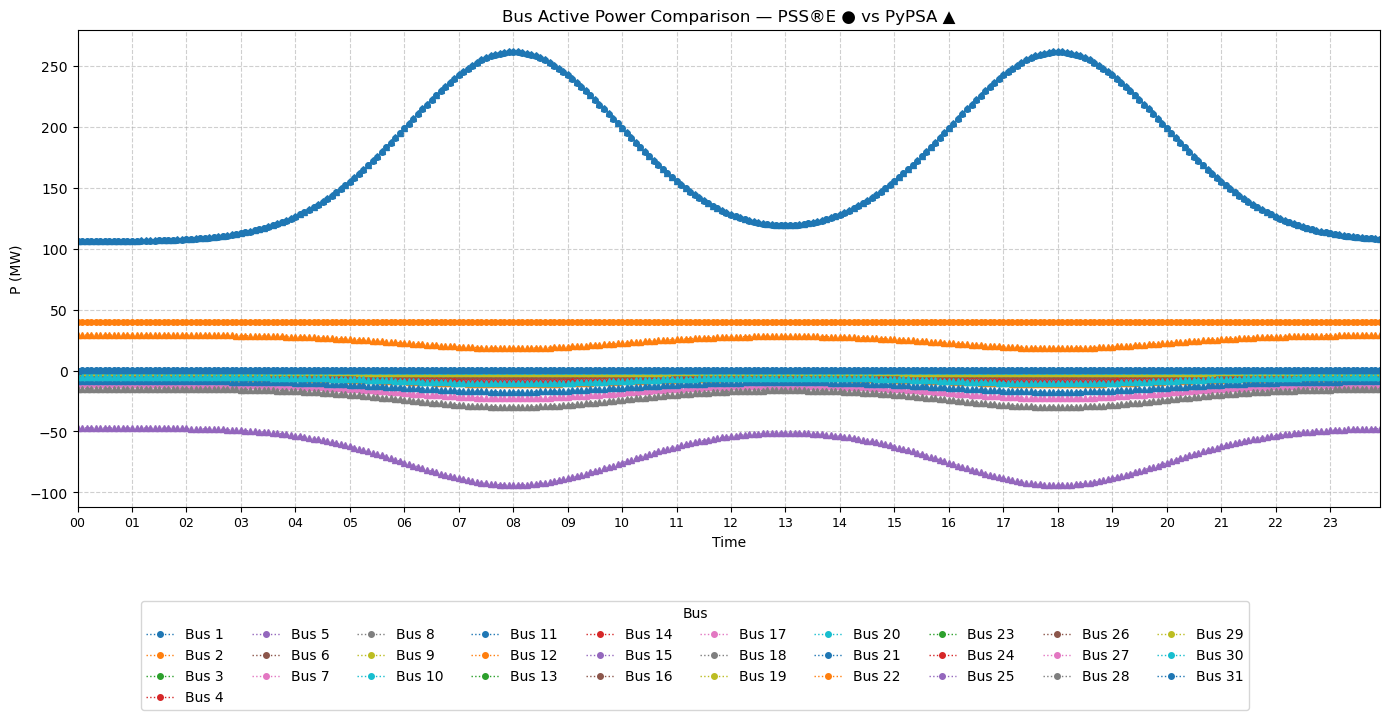

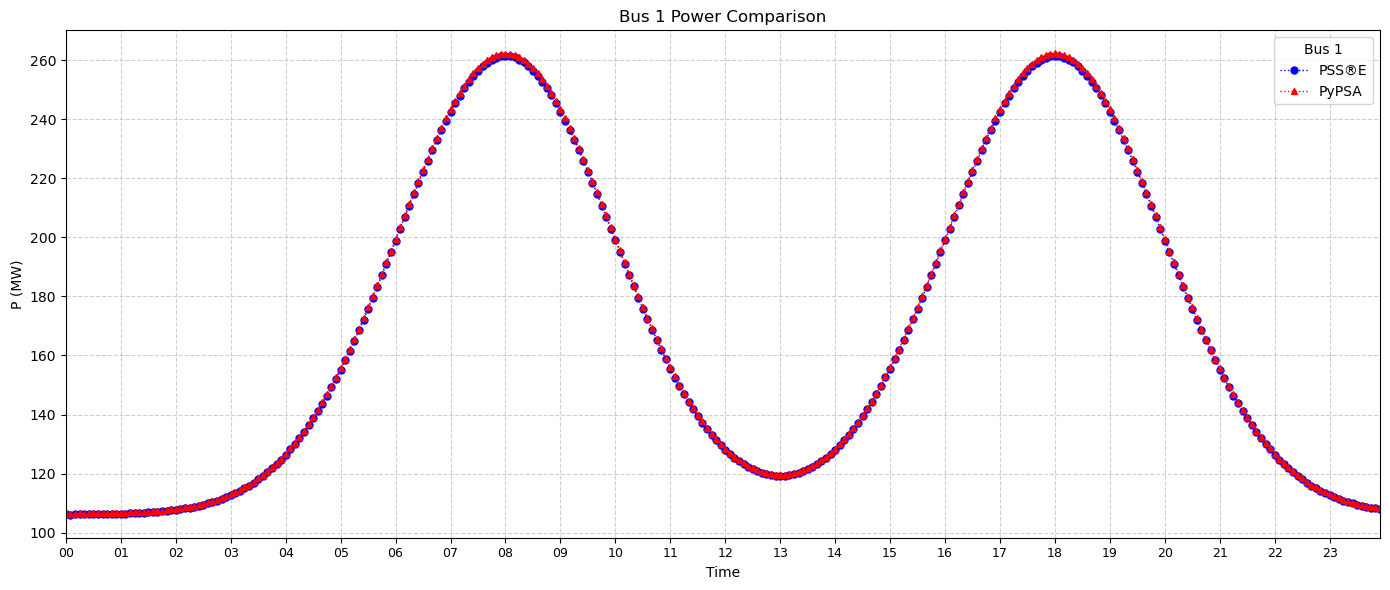

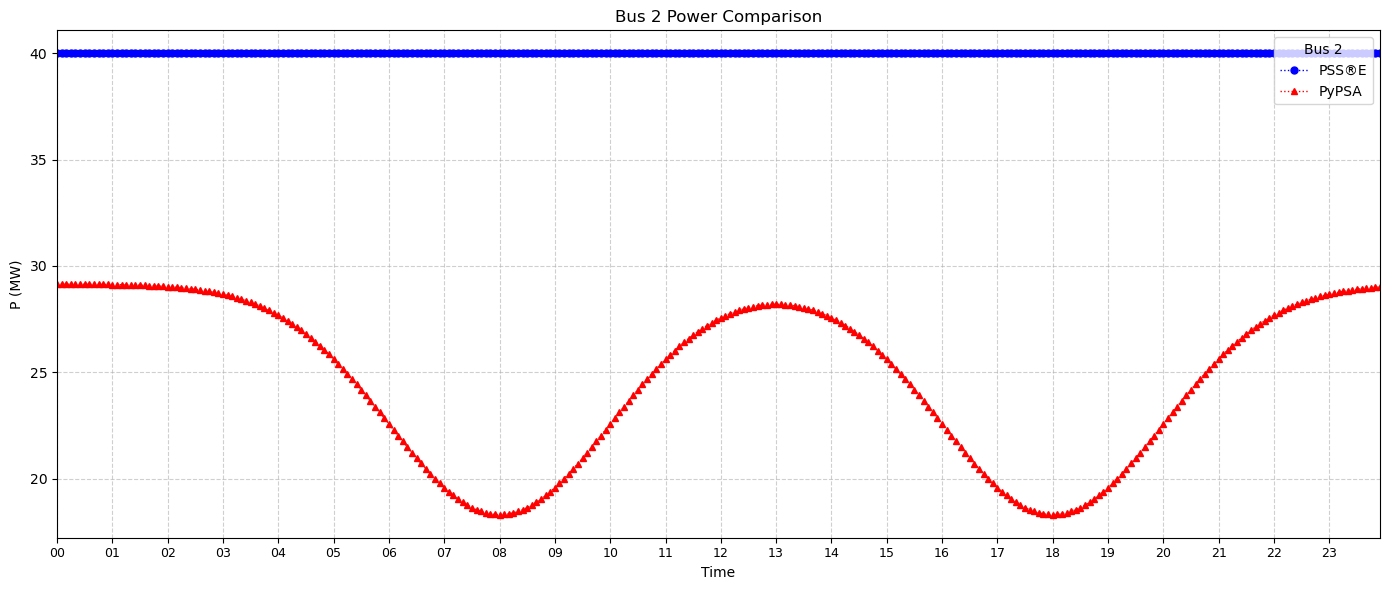

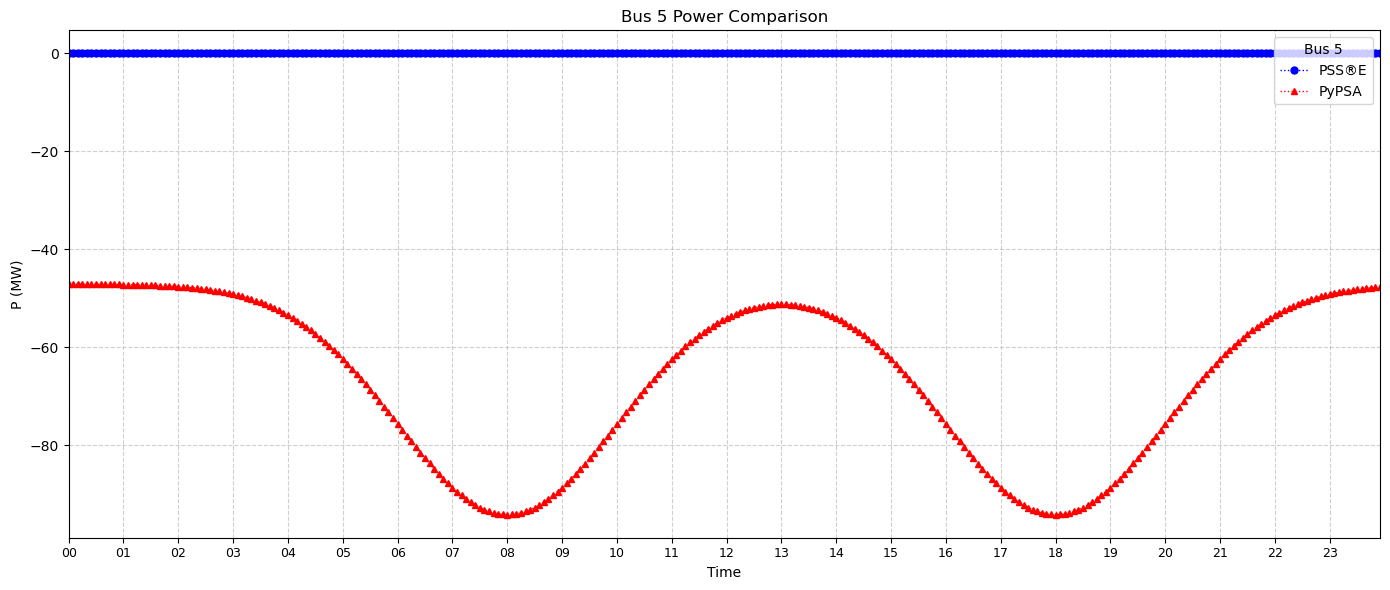

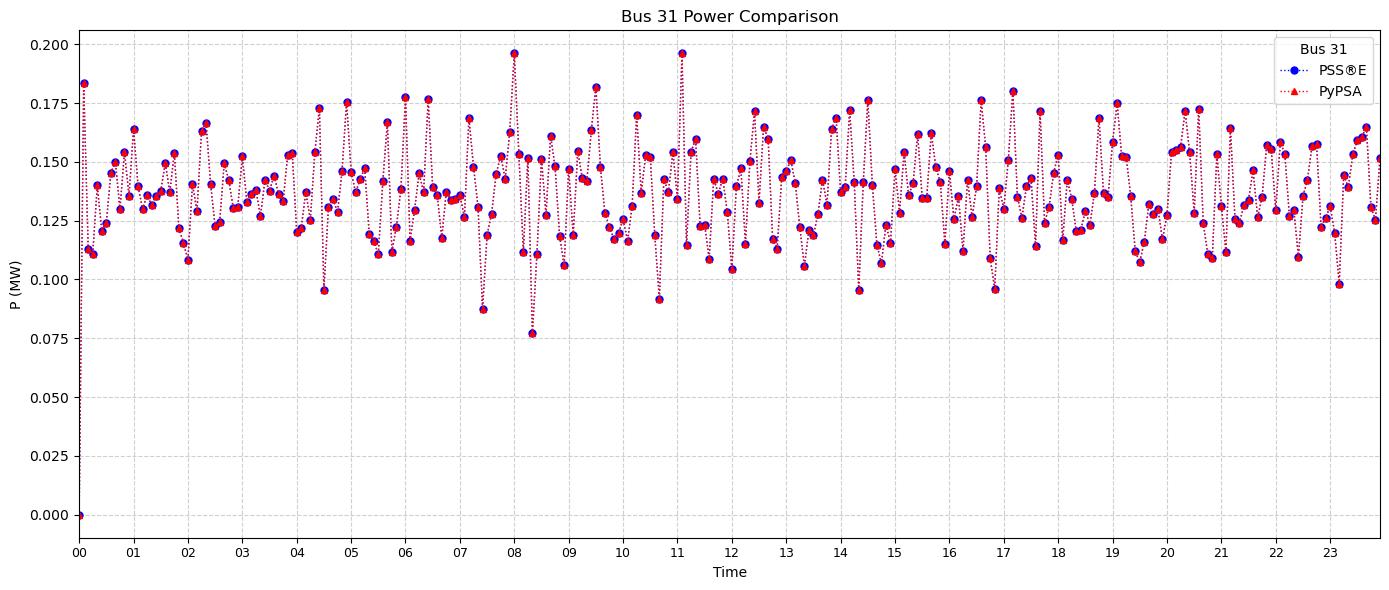

In [16]:
engine.viz.plot_bus_power_comparison()
engine.viz.plot_bus_power_comparison(1)
engine.viz.plot_bus_power_comparison(2)
engine.viz.plot_bus_power_comparison(5)
engine.viz.plot_bus_power_comparison(31)

#### Inspect Active Power 'P' at key Generators

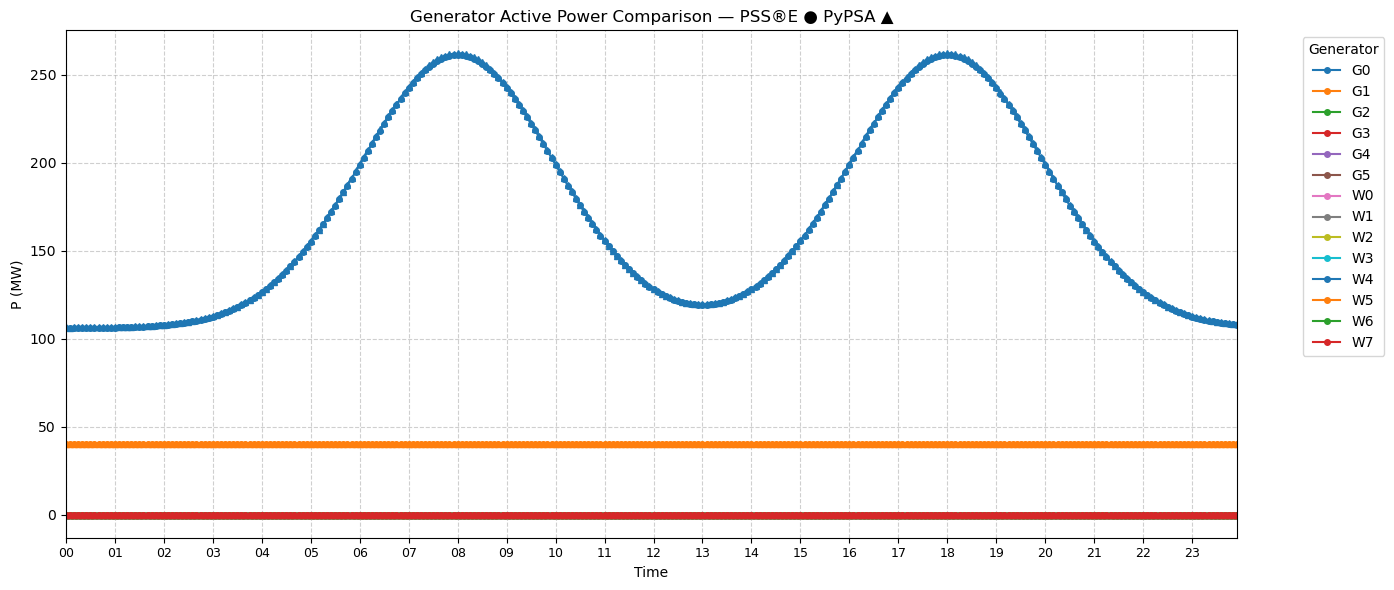

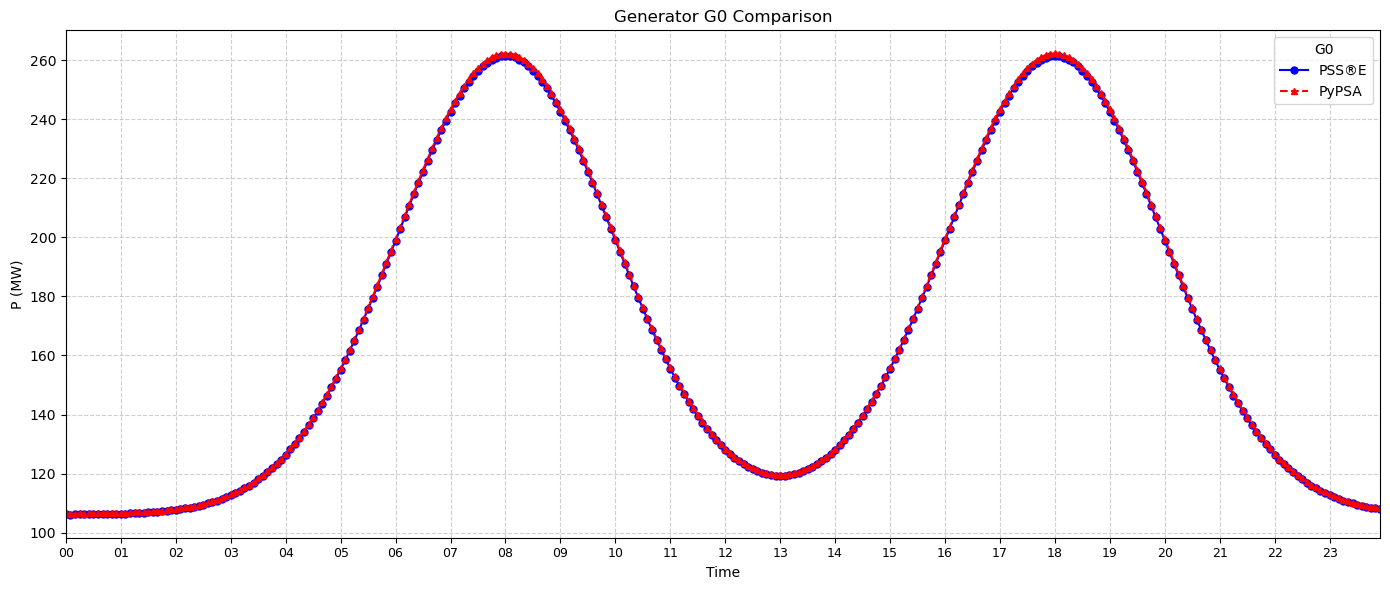

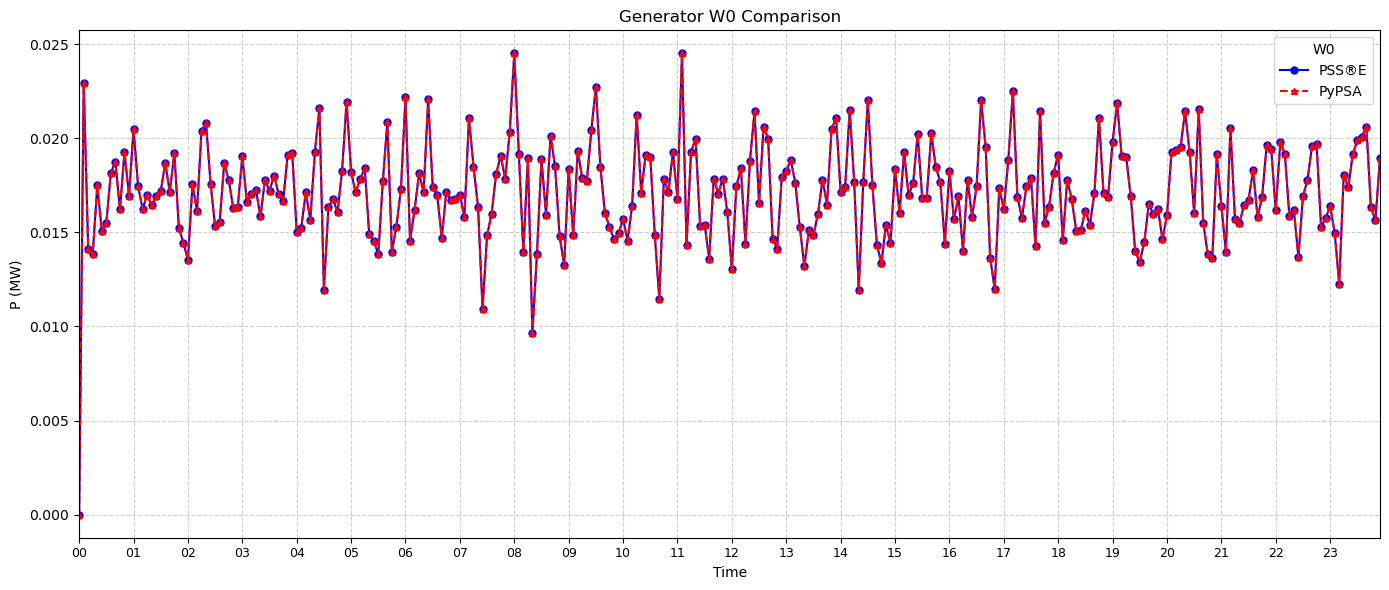

In [17]:
engine.viz.plot_generator_comparison()
engine.viz.plot_generator_comparison("G0")
engine.viz.plot_generator_comparison("W0")

---
### Part 5: Save and load the simulation results

In [18]:
# engine.save_simulation(sim_name="IEEE30 bus SoftwareX example", 
#                        notes = "Example simulation of IEEE 30 bus system using WECGrid. This simulation uses both PSSE and PyPSA engines to demonstrate the capabilities of WECGrid. We applied 8 WECs to bus 31 with a 2 peaking load curve."
# )

In [19]:
sim_results = engine.pull_sim()

In [20]:
sim_results['psse_gen']['p_mw']

gen_id                       G0    G1   G2   G3   G4   G5        W0        W1  \
timestamp                                                                       
1997-11-03 00:00:00  106.253433  40.0  0.0  0.0  0.0  0.0  0.000000  0.000000   
1997-11-03 00:05:00  106.091057  40.0  0.0  0.0  0.0  0.0  0.022921  0.022921   
1997-11-03 00:10:00  106.171623  40.0  0.0  0.0  0.0  0.0  0.014095  0.014095   
1997-11-03 00:15:00  106.185661  40.0  0.0  0.0  0.0  0.0  0.013875  0.013875   
1997-11-03 00:20:00  106.171265  40.0  0.0  0.0  0.0  0.0  0.017494  0.017494   
...                         ...   ...  ...  ...  ...  ...       ...       ...   
1997-11-03 23:35:00  109.094345  40.0  0.0  0.0  0.0  0.0  0.020083  0.020083   
1997-11-03 23:40:00  108.753876  40.0  0.0  0.0  0.0  0.0  0.020598  0.020598   
1997-11-03 23:45:00  108.484413  40.0  0.0  0.0  0.0  0.0  0.016328  0.016328   
1997-11-03 23:50:00  108.216728  40.0  0.0  0.0  0.0  0.0  0.015663  0.015663   
1997-11-03 23:55:00  107.945297  40.0  0.0  0.0  0.0  0.0  0.018971  0.018971   

gen_id                     W2        W3        W4        W5        W6  \
timestamp                                                               
1997-11-03 00:00:00  0.000000  0.000000  0.000000  0.000000  0.000000   
1997-11-03 00:05:00  0.022921  0.022921  0.022921  0.022921  0.022921   
1997-11-03 00:10:00  0.014095  0.014095  0.014095  0.014095  0.014095   
1997-11-03 00:15:00  0.013875  0.013875  0.013875  0.013875  0.013875   
1997-11-03 00:20:00  0.017494  0.017494  0.017494  0.017494  0.017494   
...                       ...       ...       ...       ...       ...   
1997-11-03 23:35:00  0.020083  0.020083  0.020083  0.020083  0.020083   
1997-11-03 23:40:00  0.020598  0.020598  0.020598  0.020598  0.020598   
1997-11-03 23:45:00  0.016328  0.016328  0.016328  0.016328  0.016328   
1997-11-03 23:50:00  0.015663  0.015663  0.015663  0.015663  0.015663   
1997-11-03 23:55:00  0.018971  0.018971  0.018971  0.018971  0.018971   

gen_id                     W7  
timestamp                      
1997-11-03 00:00:00  0.000000  
1997-11-03 00:05:00  0.022921  
1997-11-03 00:10:00  0.014095  
1997-11-03 00:15:00  0.013875  
1997-11-03 00:20:00  0.017494  
...                       ...  
1997-11-03 23:35:00  0.020083  
1997-11-03 23:40:00  0.020598  
1997-11-03 23:45:00  0.016328  
1997-11-03 23:50:00  0.015663  
1997-11-03 23:55:00  0.018971  

[288 rows x 14 columns]